의사결정트리 정확도: 0.9769
랜덤포레스트 정확도: 0.9653


<ipython-input-6-5e0da792ec47>:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


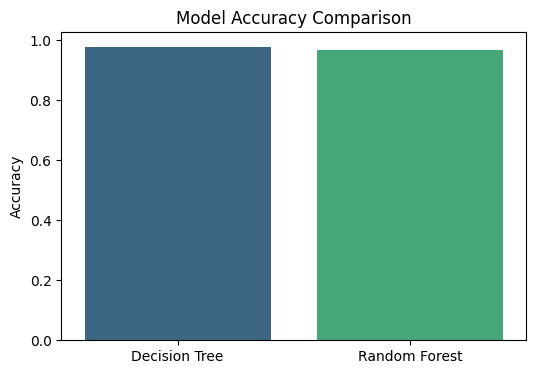

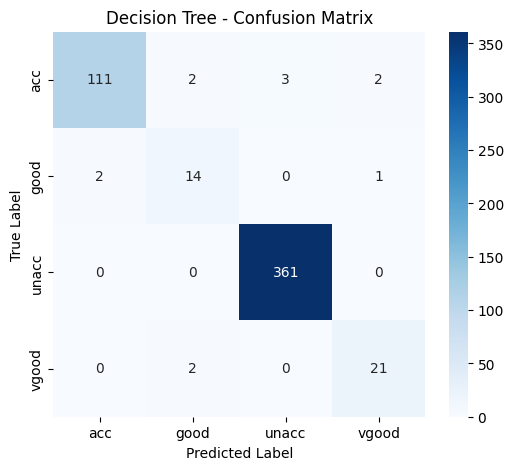

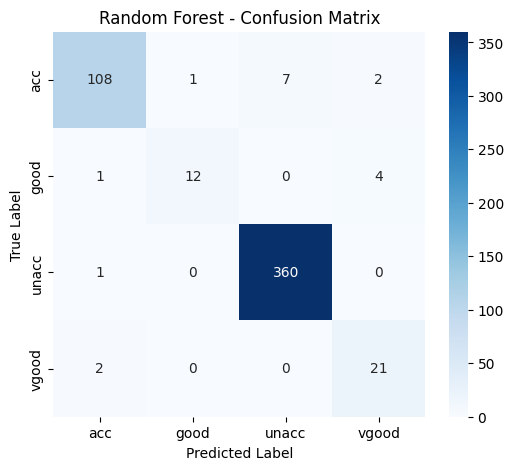

<ipython-input-6-5e0da792ec47>:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=features, palette='coolwarm')


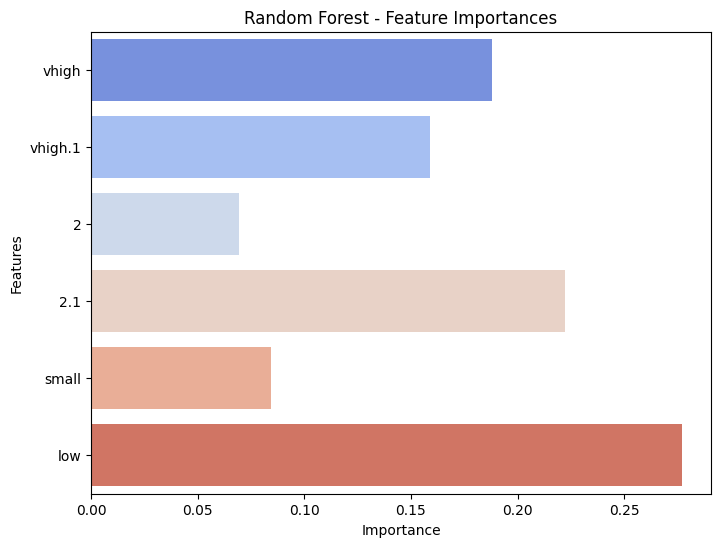


Decision Tree Classification Report:
              precision    recall  f1-score   support

         acc       0.98      0.94      0.96       118
        good       0.78      0.82      0.80        17
       unacc       0.99      1.00      1.00       361
       vgood       0.88      0.91      0.89        23

    accuracy                           0.98       519
   macro avg       0.91      0.92      0.91       519
weighted avg       0.98      0.98      0.98       519


Random Forest Classification Report:
              precision    recall  f1-score   support

         acc       0.96      0.92      0.94       118
        good       0.92      0.71      0.80        17
       unacc       0.98      1.00      0.99       361
       vgood       0.78      0.91      0.84        23

    accuracy                           0.97       519
   macro avg       0.91      0.88      0.89       519
weighted avg       0.97      0.97      0.96       519



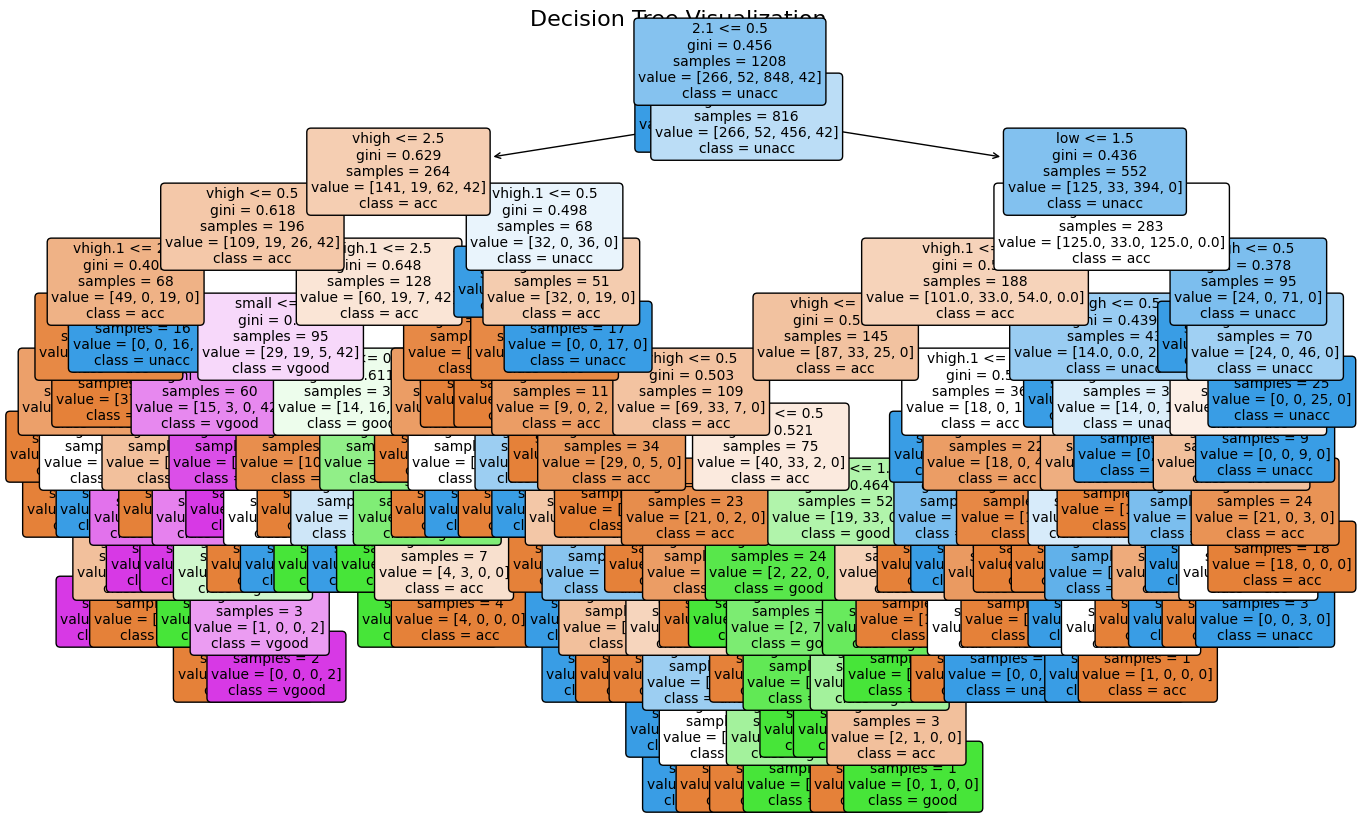

In [ ]:
# **의사결정트리(Decision Tree)**와 랜덤포레스트(Random Forest) 알고리즘의 차이를 이해하기
# 학습 결과를 시각화하여 분석하고, 어떤 모델이 더 성능이 좋은지 탐구

# 1. 데이터 준비 제공된 car_evaluation.csv 파일을 다운로드하여 코랩(Colab)에 업로드한 후, 필요한 전처리를 진행해주세요.(범주형 데이터를 숫자로 변환)

# 2. 모델 학습
# 의사결정트리와 랜덤포레스트 모델을 학습한 후, 각 모델의 테스트 세트에 대한 정확도(Accuracy)를 계산

# 3. 결과 시각화
# 정확도 비교: 두 모델의 정확도를 막대그래프로 시각화.
# Confusion Matrix: 두 모델의 예측 결과를 비교하여 정확히 분류된 사례와 오분류된 사례를 분석.
# 특성 중요도: 랜덤포레스트에서 특성 중요도를 계산하고 시각화하여, 모델이 어떤 특성을 더 중요하게 여겼는지 확인.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. 데이터 불러오기
df = pd.read_csv('car_evaluation.csv', encoding='cp949')

# 데이터 살펴보기
# print("데이터 샘플:")
# print(df.head())
# print("\n데이터 정보:")
# print(df.info())

# 범주형 데이터를 숫자로 변환 (Label Encoding)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for column in df.columns:
    df[column] = encoder.fit_transform(df[column])

# 변환된 데이터 살펴보기
# print("\n숫자로 변환된 데이터 샘플:")
# print(df.head())

# 입력 데이터(X)와 타겟 변수(y) 분리
X = df.iloc[:, :-1]  # 마지막 열 제외
y = df.iloc[:, -1]   # 마지막 열 (Target)

# 데이터 분리 (훈련/테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ******************************************************************************** #

# 2-1. 모델 학습 - 의사결정트리 모델
dt_model = DecisionTreeClassifier(random_state=42) # DecisionTreeClassifier 클래스를 사용하여 의사결정트리 모델 객체를 생성
dt_model.fit(X_train, y_train) # 의사결정트리 모델 학습
dt_predictions = dt_model.predict(X_test) # 학습된 모델을 사용하여 테스트 데이터를 예측
dt_accuracy = accuracy_score(y_test, dt_predictions) # 모델의 정확도(Accuracy)를 계산

# 2-2. 모델 학습 - 랜덤포레스트 모델
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

# 정확도 출력
print(f"의사결정트리 정확도: {dt_accuracy:.4f}")
print(f"랜덤포레스트 정확도: {rf_accuracy:.4f}")

# ******************************************************************************** #

# 3. 결과 시각화
# 정확도 비교 (막대 그래프)
plt.figure(figsize=(6, 4)) # figsize=(6, 4): 가로 6인치, 세로 4인치로 그래프의 크기를 설정

# 모델 이름과 정확도 데이터를 리스트로 정의
models = ['Decision Tree', 'Random Forest']
accuracies = [dt_accuracy, rf_accuracy]

sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

# Confusion Matrix 시각화
# Confusion Matrix(혼동 행렬)은 분류 모델의 성능을 평가하기 위해 사용되는 도구
# 이 행렬은 예측된 결과와 실제 결과를 비교하여, 모델이 얼마나 정확히 작동했는지 알려줌
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Confusion Matrix 계산 및 시각화
dt_cm = confusion_matrix(y_test, dt_predictions)
rf_cm = confusion_matrix(y_test, rf_predictions)

plot_confusion_matrix(dt_cm, "Decision Tree")
plot_confusion_matrix(rf_cm, "Random Forest")

# 특성 중요도 시각화 (랜덤포레스트)
feature_importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances, y=features, palette='coolwarm')
plt.title("Random Forest - Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# 모델 분석 결과 출력
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, dt_predictions, target_names=encoder.classes_))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_predictions, target_names=encoder.classes_))

# 3. 의사결정트리 시각화
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.figure(figsize=(16, 10))
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=encoder.classes_,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization", fontsize=16)
plt.show()

**결과 분석 - <의사결정트리 vs 랜덤포레스트>**

의사결정트리 정확도: 0.9769

랜덤포레스트 정확도: 0.9653

=> 의사결정트리가 약간 더 높은 정확도를 기록

이는 의사결정트리가 특정 데이터셋에 과적합될 가능성이 높기 때문에 발생한 것으로 보임.

랜덤포레스트는 앙상블 기법으로 안정적인 성능을 제공하지만,
때로는 개별 트리의 최대 성능에 약간 미치지 못할 수 있음.

**Classification Report 분석**

Precision (정밀도), Recall (재현율, 정확하게 예측한 비율), F1-score (Precision과 Recall의 조화 평균), Support (각 클래스에 속하는 실제 데이터 샘플의 수)

**Decision Tree Classification Report:**

```
              precision    recall  f1-score   support

         acc       0.98      0.94      0.96       118
        good       0.78      0.82      0.80        17
       unacc       0.99      1.00      1.00       361
       vgood       0.88      0.91      0.89        23

    accuracy                           0.98       519
   macro avg       0.91      0.92      0.91       519
weighted avg       0.98      0.98      0.98       519
```

의사결정트리:

이 데이터셋에서는 정확도가 더 높으며, acc와 unacc 클래스에서 뛰어난 성능을 보임.

데이터셋이 작고 과적합을 방지할 필요가 적을 때 적합한 모델.


**Random Forest Classification Report:**

```
              precision    recall  f1-score   support

         acc       0.96      0.92      0.94       118
        good       0.92      0.71      0.80        17
       unacc       0.98      1.00      0.99       361
       vgood       0.78      0.91      0.84        23

    accuracy                           0.97       519
   macro avg       0.91      0.88      0.89       519
weighted avg       0.97      0.97      0.96       519
```
랜덤포레스트:

전반적으로 안정적이고 과적합 가능성이 낮은 모델.

good 클래스에서는 재현율이 낮아 성능이 떨어졌지만,
데이터가 더 커지고 복잡할 경우 더 우수한 성능을 보일 가능성이 있음.



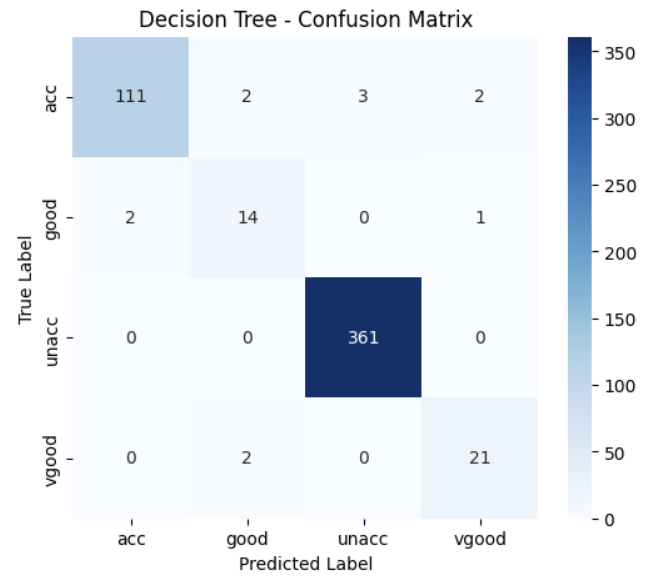

**Confusion Matrix 분석 - Decision Tree**

[acc 클래스]

정확하게 분류: 111건

오분류: good(2건), unacc(3건), vgood(2건)

[good 클래스]

정확하게 분류: 14건

오분류: acc(2건), vgood(1건)

[unacc 클래스]

정확하게 분류: 361건 (완벽한 예측)

[vgood 클래스]

정확하게 분류: 21건

오분류: good(2건)

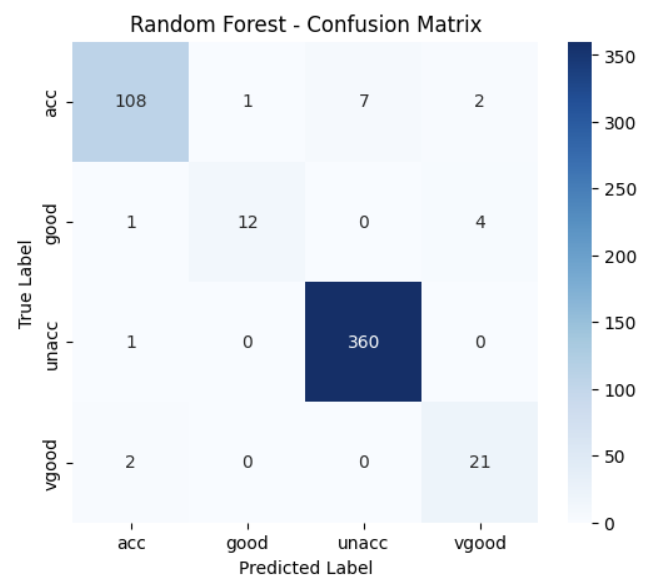

**Confusion Matrix 분석 - Random Forest**

[acc 클래스]

정확하게 분류: 108건

오분류: good(1건), unacc(7건), vgood(2건)

[good 클래스]

정확하게 분류: 12건

오분류: acc(1건), vgood(4건)

[unacc 클래스]

정확하게 분류: 360건 (거의 완벽한 예측)

오분류: acc(1건)

[vgood 클래스]

정확하게 분류: 21건

오분류: acc(2건)

의사결정트리는 단일 트리 기반으로 빠르고 정확하게 예측하였지만, 과적합 위험이 있음.

랜덤포레스트는 랜덤포레스트는 전반적으로 균형 잡힌 예측을 수행하지만 일부 클래스에서 오분류 발생, 안정적인 성능을 제공합니다.

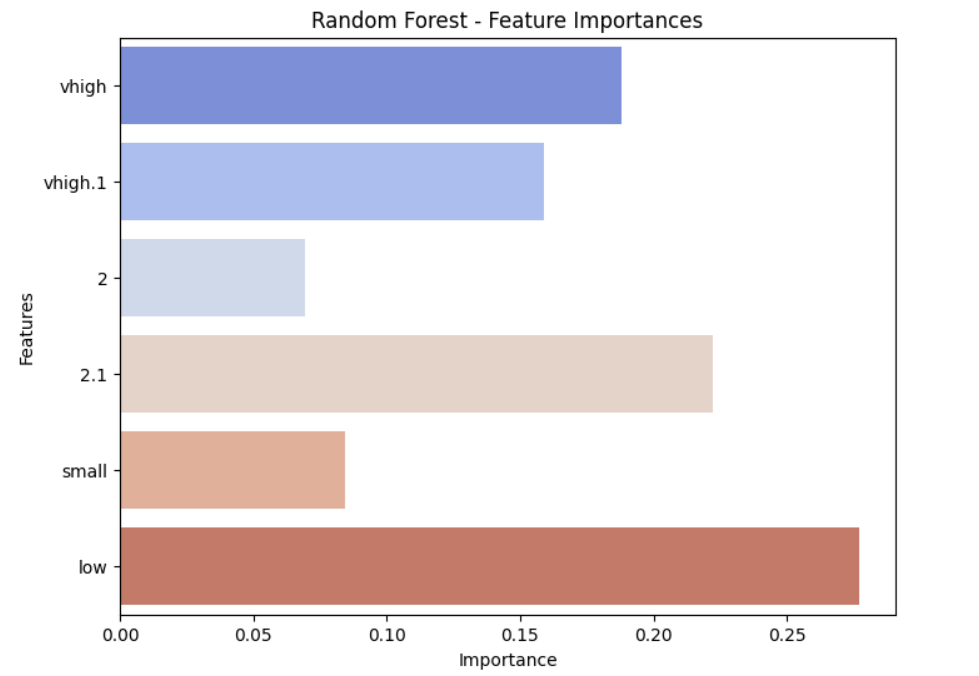

**특성 중요도 (Feature Importance)**

랜덤포레스트 모델의 특성 중요도를 계산하여 어떤 특성을 더 중요하게 사용하는지를 시각화를 하였음

가장 중요한 특성: low (가중치 0.27)

다음으로 중요한 특성: 2.1와 vhigh

이는 모델이 주어진 데이터에서 특정 속성을 더 많이 참조하여 의사결정을 내렸음을 의미

=> 랜덤포레스트는 특정 특성(low)에 의존도가 높음

=> 현재 데이터셋에서는 의사결정트리가 더 적합한 선택으로 보임.

그러나 랜덤포레스트는 과적합 방지와 안정성을 보장하기 때문에,
새로운 데이터에 대한 일반화 성능이 중요한 경우 더 나은 선택이 될 수 있다고 생각함.